In [91]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

In [93]:
def make_cp(df):
    prev = -1
    changePoint=[]
    for i in df.iloc:
        now = i['H']
        if prev!=now:
            changePoint.append(i['ds'])
            prev = now
    return changePoint

In [94]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df3_s = make_df('H-S_seq_3.csv',ID = 'data3',slicing=10)

cp = []
df1_cp = make_cp(df1)
df2_cp = make_cp(df2)
df3_cp = make_cp(df3)
df4_cp = make_cp(df4)
df5_cp = make_cp(df5)
df6_cp = make_cp(df6)
df7_cp = make_cp(df7)
df8_cp = make_cp(df8)
cp.extend(df1_cp)
cp.extend(df2_cp)
cp.extend(df3_cp)
cp.extend(df4_cp)
cp.extend(df5_cp)
cp.extend(df6_cp)
cp.extend(df7_cp)
cp.extend(df8_cp)

cp = list(set(cp))

df = pd.concat((df1,df2,df4,df6,df7,df8))

pd.set_option('display.max_rows', 10)

cp

sliced into 10 out of 62 data.


[Timestamp('2021-09-14 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timestamp('2021-10-22 00:00:00'),
 Timestamp('2022-01-06 00:00:00'),
 Timestamp('2021-08-24 00:00:00'),
 Timestamp('2021-09-07 00:00:00'),
 Timestamp('2021-12-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-26 00:00:00'),
 Timestamp('2021-10-15 00:00:00'),
 Timestamp('2021-12-04 00:00:00'),
 Timestamp('2021-10-19 00:00:00'),
 Timestamp('2021-12-23 00:00:00'),
 Timestamp('2021-08-06 00:00:00'),
 Timestamp('2021-12-29 00:00:00'),
 Timestamp('2021-10-08 00:00:00')]

In [95]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  # drop_missing = True,
                  optimizer = 'AdamW'
                #   changepoints=cp
                  )

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
m.fit(df,progress='bar')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,5.339704,5.839704,6.090716,3.736663,0.0
1,5.210555,5.710555,5.968084,3.646989,0.0
2,5.066056,5.566056,5.821910,3.545339,0.0
3,4.900341,5.400341,5.650703,3.428829,0.0
4,4.703551,5.203551,5.438660,3.291532,0.0
...,...,...,...,...,...
269,0.000828,0.028018,0.039463,0.000316,0.0
270,0.000828,0.028014,0.039476,0.000316,0.0
271,0.000828,0.028011,0.039357,0.000316,0.0
272,0.000828,0.027996,0.039610,0.000316,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/ubuntu/anaconda3/envs/hscode/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - /home/ubuntu/anaconda3/envs/hscode/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

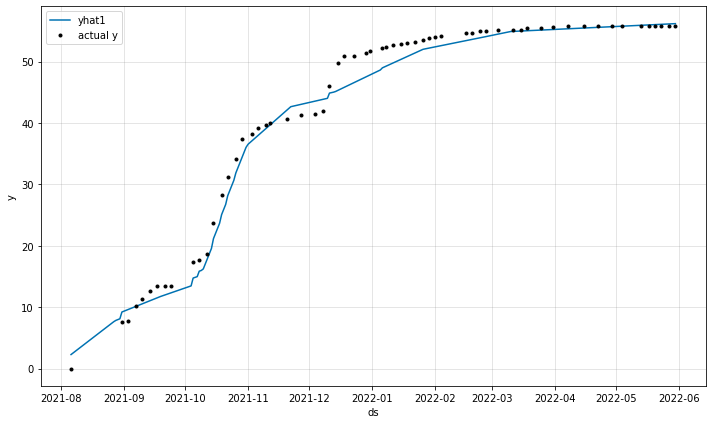

In [96]:
f1 = m.predict(df3)
m.plot(f1)
df2 = f1[['ds','yhat1']]
df2.rename(columns={'yhat1' : 'y'}, inplace = True)
df2['ID']='df2'

In [97]:
df3_s = df3_s[['ds','y','ID']]
ddf = pd.concat((df2,df3_s))
m2 = NeuralProphet(learning_rate=0.1,
                   yearly_seasonality=False,
                   weekly_seasonality=False,
                   unknown_data_normalization=True,
                   newer_samples_weight=4,
                   n_forecasts = 300,
                   # drop_missing = True,
                   optimizer='AdamW'
                   #   changepoints=cp
                   )
m2.fit(ddf)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.361% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.forecaster.__handle_missing_data) - dropped 51 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 299
WARNING - (NP.forecaster._train) - When Global modeling with local normalization, metrics are displayed in normalized scale.
Epoch[299/299]: 100%|████████

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.238414,1.732664,1.820132,0.921567,0.0
1,1.198808,1.691981,1.780599,0.893458,0.0
2,1.155601,1.647528,1.733555,0.862368,0.0
3,1.107191,1.597489,1.682773,0.827445,0.0
4,1.050999,1.539216,1.621064,0.786953,0.0
...,...,...,...,...,...
294,0.000596,0.014187,0.025646,0.000380,0.0
295,0.000596,0.014181,0.026458,0.000380,0.0
296,0.000596,0.014180,0.026978,0.000380,0.0
297,0.000596,0.014187,0.025850,0.000380,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.361% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.361% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


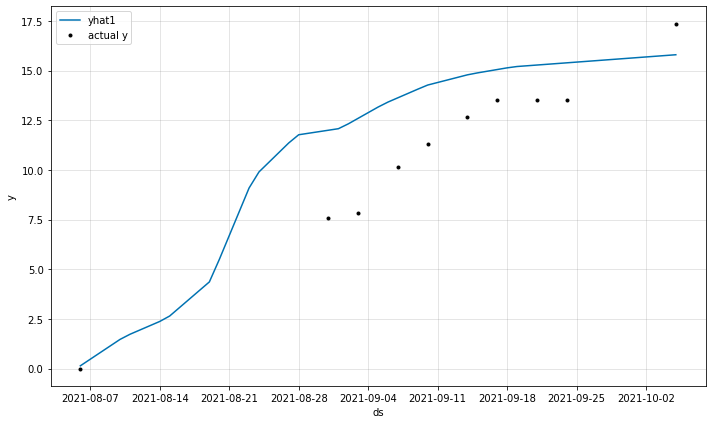

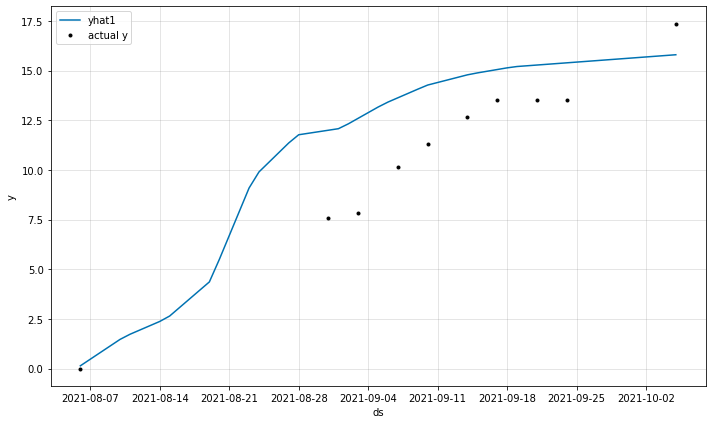

In [98]:
f2= m2.predict(df3_s)
m2.plot(f2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.361% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.723% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.723% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


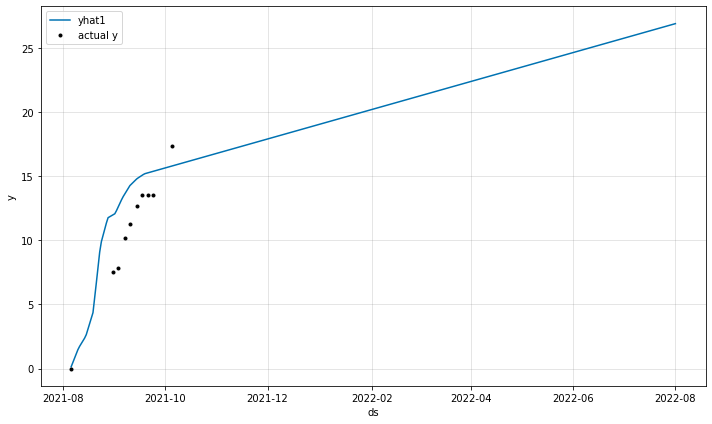

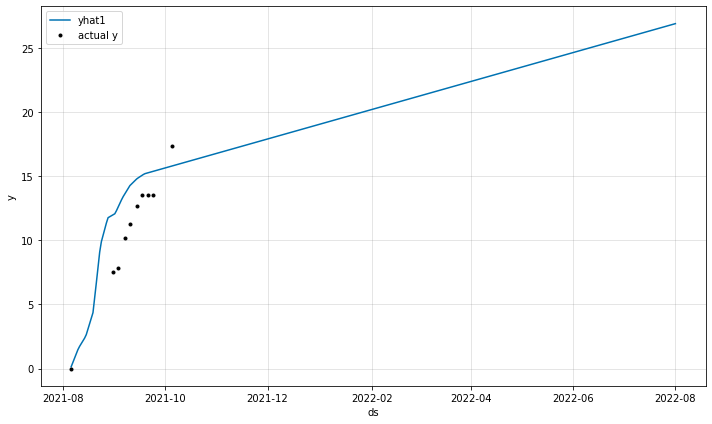

In [99]:
future = m2.make_future_dataframe(df3_s, periods=300, n_historic_predictions=True)
forecast_future = m2.predict(future)

m2.plot(forecast_future)
